__«Моделирование вкладов физических лиц»__

__Задача:__ построить и описать модель, где целевой переменной (таргетом) являются помесячные изменения объемов рынка вкладов физических лиц РФ в рублях, которая будет объяснима с точки зрения экономической логики. Дополнительно требуется построить прогноз таргета на 01.2017 – 12.2017.

__Данные:__ в файле xls представлены данные по изменениям объемов вкладов физических лиц в рублях в РФ, а также ставки по продукту, связанным с ним продуктам и макроэкономические показатели. В качестве объясняющих факторов можно использовать как показатели, представленные в базе, так и самостоятельно найденные показатели (например, на сайте Росстата или ЦБ).

__Модель:__ оценивание можно проводить с помощью любых моделей (методов и алгоритмов), однако, они должны показывать, как хорошее качество с точки зрения описания взаимосвязей, так и высокую предсказательную силу на будущий период. Так же модель должна давать согласующиеся с экономической логикой зависимости.

__Формат отчета:__ Моделирование можно делать в любом статистическом пакете или среде программирования. На выходе нужно предоставить jupyter_notebook / rmarkdown / аналог с понятным описанием логики построения модели и интерпретацией результатов или аналог в doc / ppt / pdf / html

Чтение данных и импорт нужных библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

%pylab inline
import warnings
import itertools
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel('C:/Users/DariaMishina/ML Daria/BST_DataSet.xlsx')

1. Осмотр данных;
2. Первичный анализ данных в столбцах (распределение признака для числовых переменных, количество и каунты уникальных значений для номинативных переменных (при наличии); поиск и устранение выбросов; приведение данных в нужную форму если это нужно);
3. Корреляционный анализ количественных переменных, отбор некоррелирующих переменных;
4. Feature Engineering
5. Построение модели
6. Кросс-валидация
7. Прогноз
8. Точки роста для проекта

# Осмотр данных

In [3]:
display(df.head(10))
df.info()

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779
5,2011-06-01,227020.0,4.934762,8.25,2.6,4.2,113.76,108.89488,6017200.0,20721.9,27.98,24137
6,2011-07-01,133756.0,4.777619,8.25,2.6,4.0,116.46,108.88399,6151200.0,20828.1,27.90,23598
7,2011-08-01,10165.0,5.215217,8.25,2.6,4.1,110.08,108.62267,6204500.0,21061.9,28.77,23051
8,2011-09-01,45398.0,5.873636,8.25,2.5,4.0,110.88,108.57922,6303700.0,21480.4,30.49,23468
9,2011-10-01,17145.0,6.443810,8.25,2.9,4.5,109.47,109.10040,6349700.0,21366.7,31.35,23602


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, руб               

Датасет состоит из 84 наблюдений, в датасете 12 колонок, 11 из которых числовые и 1 - datatime. Во всех столбцах, кроме _Прирост вкладов физических лиц в рублях (млн руб)_ , отсутствуют пустые значения, но для указанного столбца, являющегося таргетом, это не пропуск, а те данные, которые нужно предсказать. Поэтому пропуски заполнять не нужно

У самого первого стобца некорректное название, поэтому присвоим его сами и заодно еще раз обозначим все названия стобцов, чтобы не было в дальнейшем проблем

In [4]:
df.columns = ['Дата', 'Прирост вкладов физических лиц в рублях (млн руб)',
              'Доходность ОФЗ по сроку до 1 года', 'Ключевая ставка',
              'Ставка по вкладам в долларах до 1 года',
              'Ставка по вкладам в рублях до 1 года', 'Нефть марки Юралс, долл./барр',
              'Индекс потребительских цен, ед.', 'М0, руб', 'М2, руб',
              'Курс доллара к рублю, руб', 'Номинальная средняя з/п, руб']

Переименуем индексы строк в даты, а столбец Дата удалим вообще

In [5]:
df = df.set_index(pd.DatetimeIndex(df['Дата']))
df.drop(['Дата'], axis=1, inplace=True)

Отделим те наблюдения, значения таргета для которых надо предсказать - _df_predict_ от основной массы наблюдений

In [6]:
df_predict = df[72:]

In [7]:
df = df[:72]

# Первичный анализ данных в столбцах

Напишем функцию, которая покажет нам распределение признаков и покажет выбросы для столбцов, у которых определены значения 

In [9]:
def first_look(col, boundaries=None):
    print('Столбец', col)
    print('Распределение признака:')
    fig, ax = plt.subplots()
    # Проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        sns.countplot(df.loc[:, col], ax=ax)
        plt.show()
    else:

        df.loc[:, col].hist(ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        plt.show()
        if boundaries is not None:  # Проверка на наличие выбросов по информации из датасета
            if df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                      pd.notnull(df.loc[:, col])].shape[0] > 0:
                print('Найдены выбросы:')
                display(df.loc[(~df.loc[:, col].between(boundaries[0], boundaries[1])) &
                               pd.notnull(df.loc[:, col])])
    print()

Распеределение и выбросы у столбца дата смотреть не будем, сделаем это для всех остальных признаков и таргета

Столбец Прирост вкладов физических лиц в рублях (млн руб)
Распределение признака:


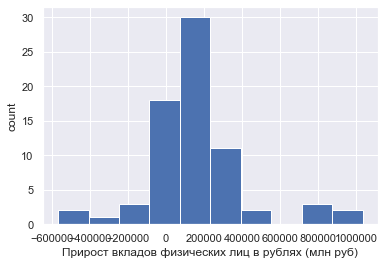


Столбец Доходность ОФЗ по сроку до 1 года
Распределение признака:


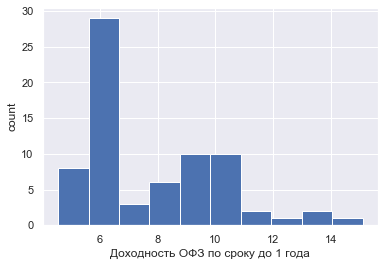


Столбец Ключевая ставка
Распределение признака:


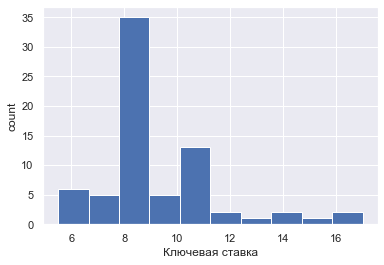


Столбец Ставка по вкладам в долларах до 1 года
Распределение признака:


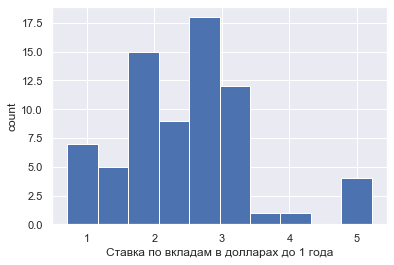


Столбец Ставка по вкладам в рублях до 1 года
Распределение признака:


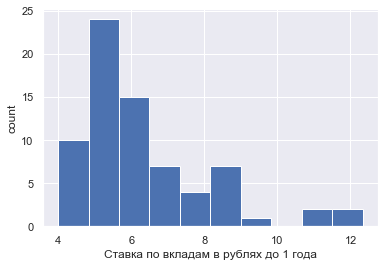


Столбец Нефть марки Юралс, долл./барр
Распределение признака:


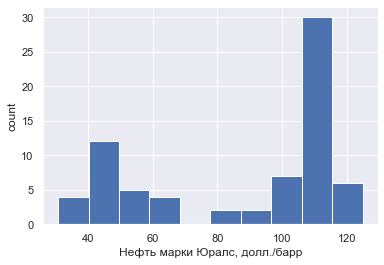


Столбец Индекс потребительских цен, ед.
Распределение признака:


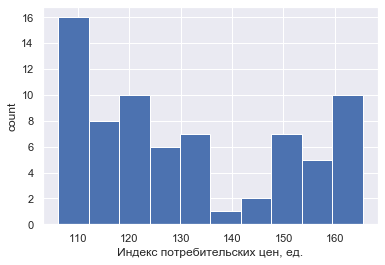


Столбец М0, руб
Распределение признака:


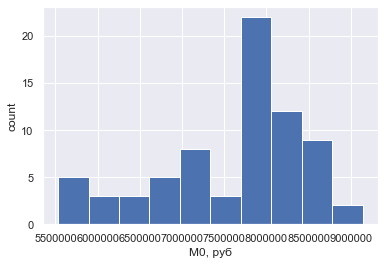


Столбец М2, руб
Распределение признака:


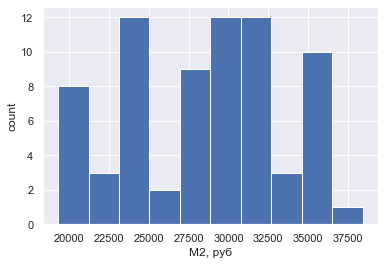


Столбец Курс доллара к рублю, руб
Распределение признака:


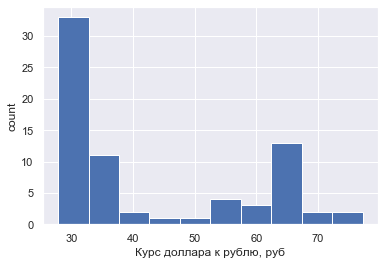


Столбец Номинальная средняя з/п, руб
Распределение признака:


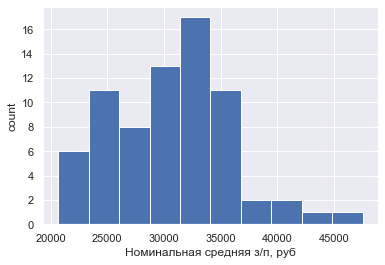

In [10]:
first_look('Прирост вкладов физических лиц в рублях (млн руб)')
first_look('Доходность ОФЗ по сроку до 1 года')
first_look('Ключевая ставка')
first_look('Ставка по вкладам в долларах до 1 года')
first_look('Ставка по вкладам в рублях до 1 года')
first_look('Нефть марки Юралс, долл./барр')
first_look('Индекс потребительских цен, ед.')
first_look('М0, руб')
first_look('М2, руб')
first_look('Курс доллара к рублю, руб')
first_look('Номинальная средняя з/п, руб')

В целом данные достаточно чистые. Отсутствие пропусков мы отследили ранее, выбросов тоже нет. В датасете есть признаки разного масштаба, поэтому применим стандартизацию. Также распределение не всех признаков нормальное, есть перепады, поэтому попробуем несколько способов для уменьшения перепадов и сглаживания "хвоста".

## Пробуем сделать распределение данных «нормальным» 

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность. 

Проверим, есть ли нулевые значения

In [11]:
df.describe()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000
mean,1.466405e+05,7.845004,9.145833,2.432361,6.296111,87.857639,131.484756,7.593138e+06,28555.823611,43.112639,30675.041667
std,2.593857e+05,2.359552,2.375695,1.000053,1.858968,29.884173,19.802619,8.700963e+05,5037.525194,15.763443,5451.277321
min,-5.674480e+05,4.558571,5.500000,0.710000,4.000000,30.800000,106.171510,5.532900e+06,19307.700000,27.870000,20669.000000
25%,1.949025e+04,6.135143,8.000000,1.752500,5.200000,55.360000,114.621930,7.086675e+06,24300.775000,31.032500,26561.250000
50%,1.129245e+05,6.547364,8.250000,2.550000,5.705000,105.470000,125.209420,7.901050e+06,29675.250000,33.240000,30957.500000
75%,2.360528e+05,9.630476,10.625000,2.925000,6.920000,110.692500,151.169625,8.204450e+06,31987.100000,61.820000,33880.000000
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000,124.930000,165.409180,9.139800e+06,38418.000000,77.220000,47554.000000


Нулевых значений ни у признаков, ни у таргета нет, поэтому попробуем прологарифмировать некоторые из признаков и оценим их распределение после этого

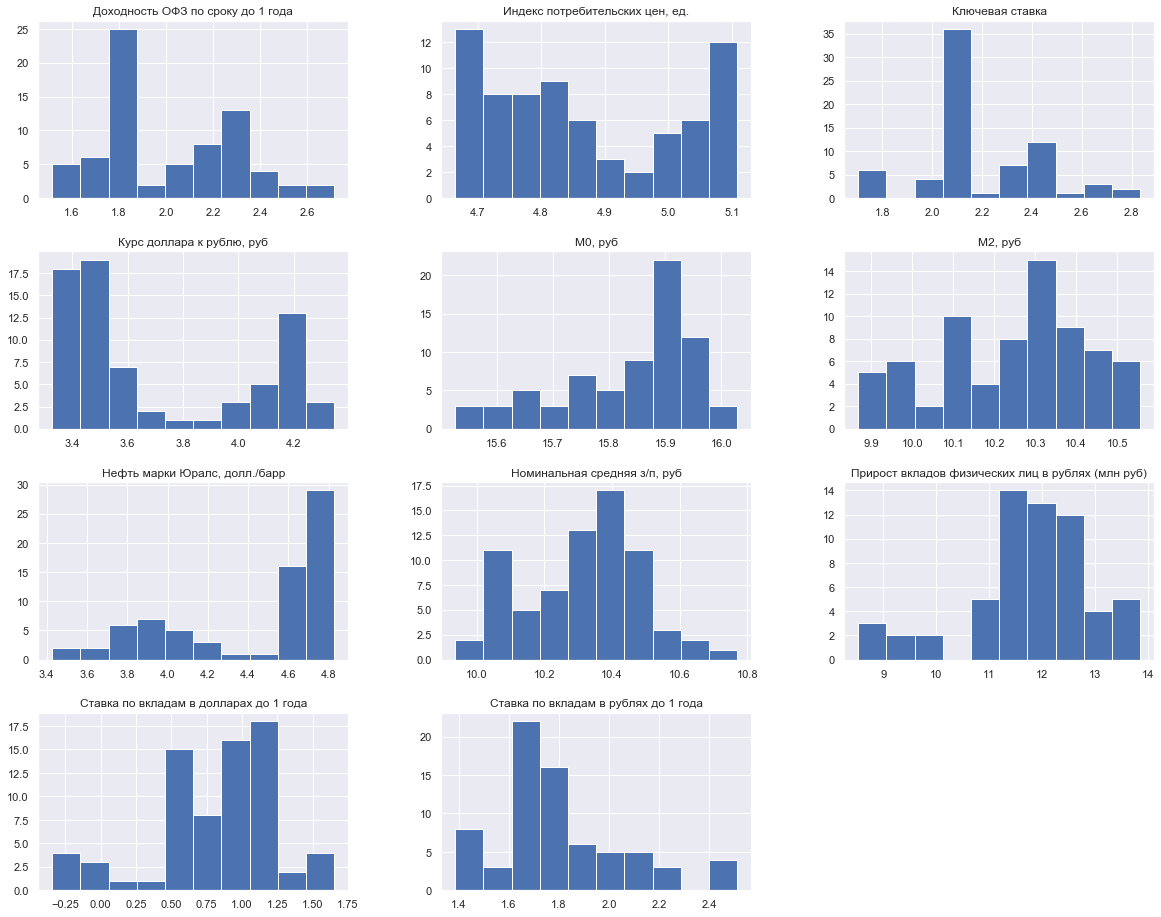

In [45]:
df.apply(lambda w: np.log(w)).hist(figsize=(20,16));

После логарифмирования распределение не стало стало у некоторых признаков лучше, попробуем извлечь корень квадратный и оценить получивашееся распределение снова

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


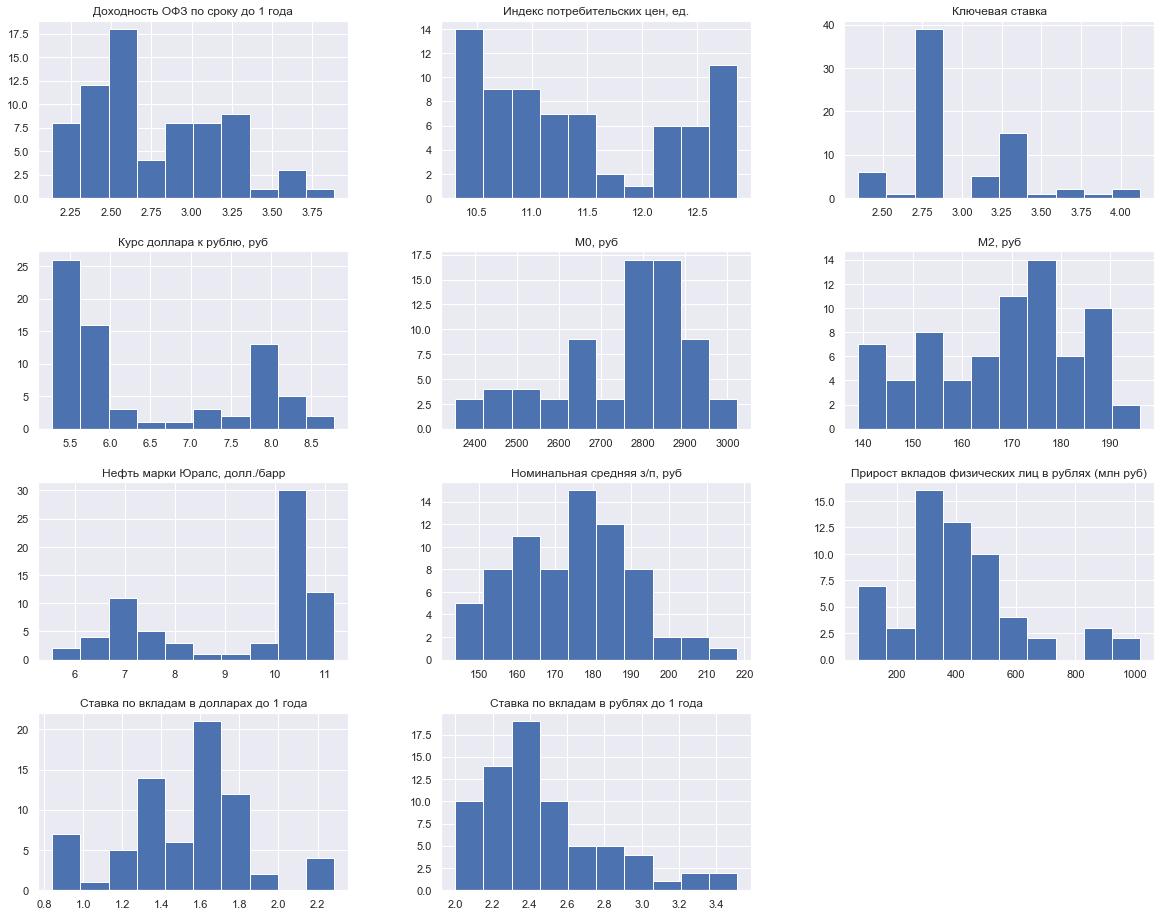

In [47]:
df.apply(lambda w: np.sqrt(w)).hist(figsize=(20,16));

Распределение стало выглядеть лучше после извлечения квадратного корня для стоблцов _Доходность ОФЗ по сроку до 1 года_ , _Ставка по вкладам в рублях до 1 года_ и _Номинальная средняя з/п, руб_ и после логарифмирования для столбцов _М0, руб_ и _М2, руб_ Перезапишем датафрейм для этих признаков

In [8]:
df['Доходность ОФЗ по сроку до 1 года'] = df['Доходность ОФЗ по сроку до 1 года'].apply(
    lambda w: np.sqrt(w))
df['Ставка по вкладам в рублях до 1 года'] = df['Ставка по вкладам в рублях до 1 года'].apply(
    lambda w: np.sqrt(w))
df['Номинальная средняя з/п, руб'] = df['Номинальная средняя з/п, руб'].apply(
    lambda w: np.sqrt(w))
df['М0, руб'] = df['М0, руб'].apply(lambda w: np.log(w))
df['М2, руб'] = df['М2, руб'].apply(lambda w: np.log(w))

# Корреляционный анализ

Используем для наглядности матрицу корреляций:

In [199]:
df.corr()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Прирост вкладов физических лиц в рублях (млн руб),1.000000,0.009066,0.048946,-0.012823,0.069823,-0.077074,0.098694,0.151430,0.123343,0.077381,0.384963
Доходность ОФЗ по сроку до 1 года,0.009066,1.000000,0.842034,0.049513,0.906115,-0.840938,0.822172,0.692499,0.753568,0.846238,0.690284
Ключевая ставка,0.048946,0.842034,1.000000,0.345412,0.885278,-0.744765,0.617396,0.354768,0.444490,0.721729,0.437742
Ставка по вкладам в долларах до 1 года,-0.012823,0.049513,0.345412,1.000000,0.311988,0.274273,-0.431177,-0.347100,-0.440480,-0.301627,-0.349412
Ставка по вкладам в рублях до 1 года,0.069823,0.906115,0.885278,0.311988,1.000000,-0.743841,0.685373,0.597175,0.637036,0.741086,0.602052
"Нефть марки Юралс, долл./барр",-0.077074,-0.840938,-0.744765,0.274273,-0.743841,1.000000,-0.935437,-0.608924,-0.772943,-0.985024,-0.686390
"Индекс потребительских цен, ед.",0.098694,0.822172,0.617396,-0.431177,0.685373,-0.935437,1.000000,0.782547,0.921933,0.949687,0.816123
"М0, руб",0.151430,0.692499,0.354768,-0.347100,0.597175,-0.608924,0.782547,1.000000,0.953639,0.644735,0.916447
"М2, руб",0.123343,0.753568,0.444490,-0.440480,0.637036,-0.772943,0.921933,0.953639,1.000000,0.803930,0.909195
"Курс доллара к рублю, руб",0.077381,0.846238,0.721729,-0.301627,0.741086,-0.985024,0.949687,0.644735,0.803930,1.000000,0.703904


Построим тепловую карту для большей наглядности

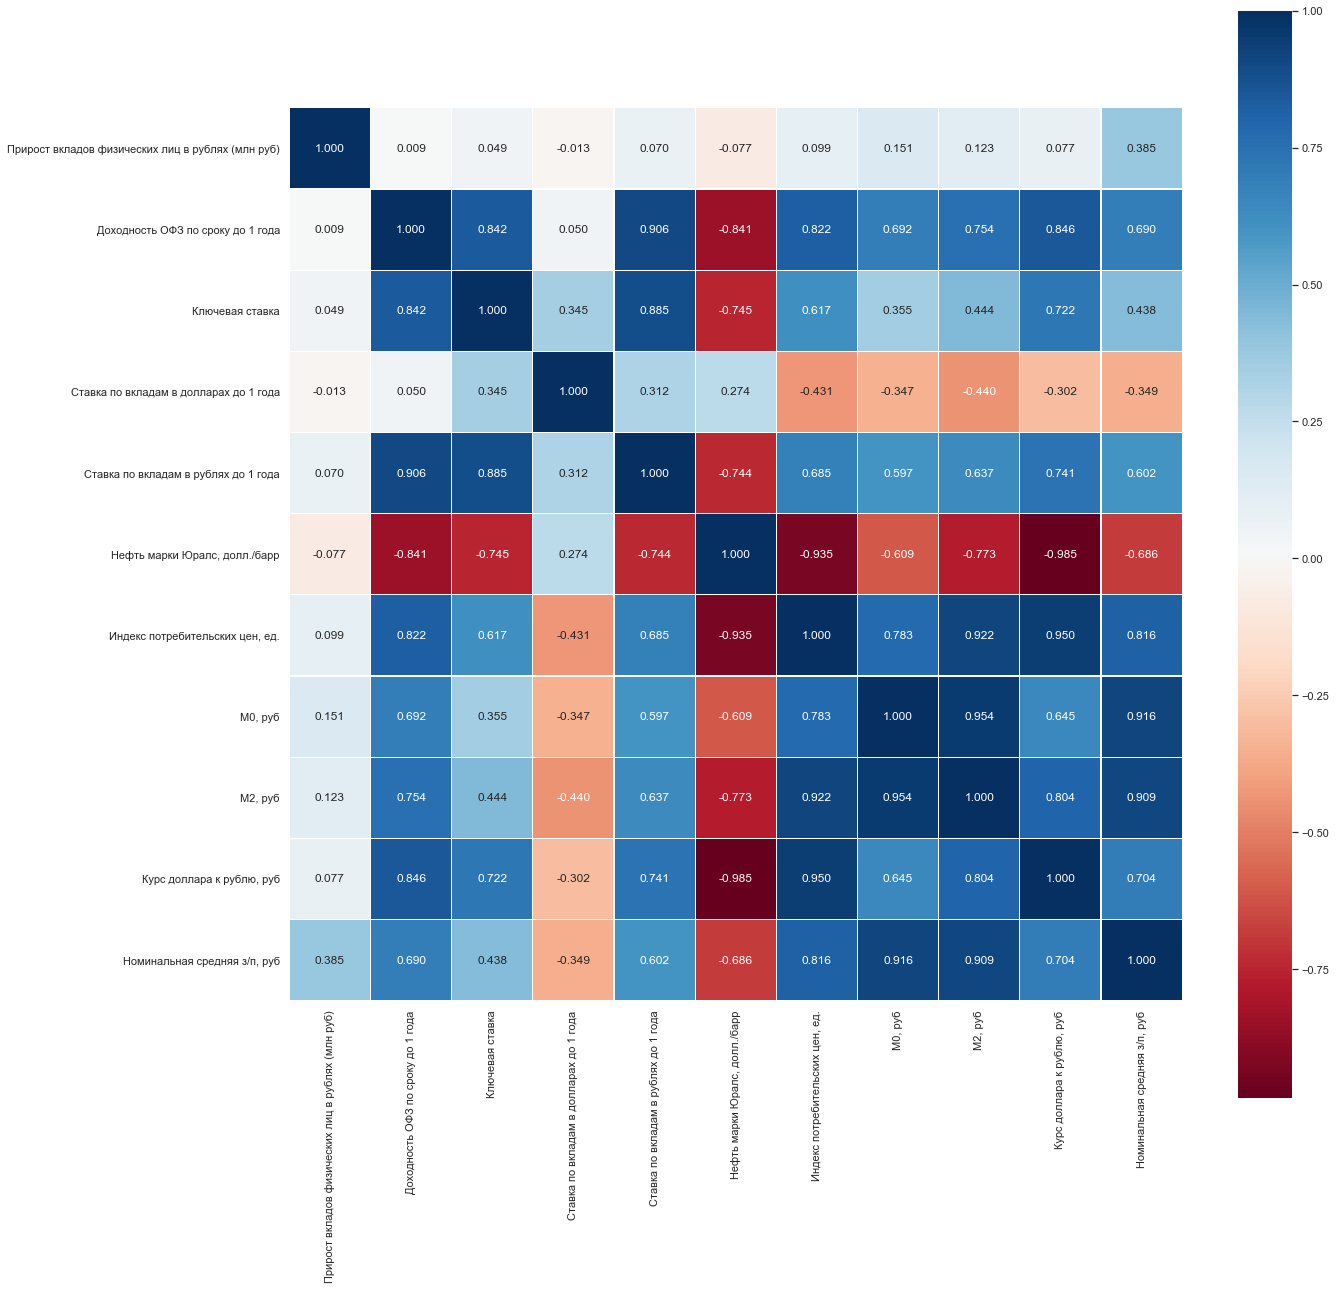

In [200]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
            annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

Корреляция признаков M0 и M2 близка к 1, что соответствует экономической логике, так как денежный агрегат М2 включает в себя М0. Удалим М0, оставим М2, так как М2 содержит в себе, помимо наличности и вкладов до востребования, еще и срочные вклады и использовать оба признака нецелесообразно

Признаки Нефть марки Юралс, долл./барр , Курс доллара к рублю, руб и Индекс потребительских цен, ед. попарно коррелируют и их корреляция близка к -1 и 1. Как только цены на нефть падают, курс доллара растет, как и ИПЦ. Как только курс доллара растет, ИПЦ сразу же увеличивается. Поэтому примем решение, что признаки Нефть марки Юралс, долл./барр и Индекс потребительских цен надо удалить и оставить признак Курс доллара к рублю, руб как более универсальный

Видим, что признаки Доходность ОФЗ по сроку до 1 года и Ключевая ставка сильно скоррелированы, это тоже в целом соответствует экономической логике, так как ключевая ставка влияет на доходность ОФЗ следующим образом: когда ЦБ повышает ключевую ставку, банки поднимают проценты по депозитам, поэтому по новым ОФЗ тоже приходится повышать купоны, чтобы конкурировать с вкладами, поэтому вероятно, что доходность новых облигаций будет в районе ключевой ставки. Удалим признак Доходность ОФЗ по сроку до 1 года

Признаки Ключевая ставка и Ставка по вкладам в рублях до 1 года тоже сильно скоррелированы, по тем же причинам, что и доходность ОФЗ - при повышении ключевой ставки ставка по депозитам растет. Удалим признак Ставка по вкладам в рублях до 1 года

Курс доллара к рублю и Номинальная средняя з/п сильно скоррелированы между собой и оба признака скоррелированы с М2. Пробовала различные комбинации (оставляла по очереди каждый из признаков), самые лучшие метрики получаются, если оставить признак M2. 

In [9]:
df.drop(['М0, руб', 'Доходность ОФЗ по сроку до 1 года', 'Нефть марки Юралс, долл./барр',
         'Индекс потребительских цен, ед.', 'Ставка по вкладам в рублях до 1 года'], axis=1, inplace=True)

In [10]:
df.drop('Номинальная средняя з/п, руб', axis = 1, inplace = True)

In [11]:
df.drop('Курс доллара к рублю, руб', axis = 1, inplace = True)

Убедимся, что избавились от мультиколлинеарности

In [12]:
df.corr()

,Прирост вкладов физических лиц в рублях (млн руб),Ключевая ставка,Ставка по вкладам в долларах до 1 года,"М2, руб"
Прирост вкладов физических лиц в рублях (млн руб),1.000000,0.048946,-0.012823,0.123343
Ключевая ставка,0.048946,1.000000,0.345412,0.444490
Ставка по вкладам в долларах до 1 года,-0.012823,0.345412,1.000000,-0.440480
"М2, руб",0.123343,0.444490,-0.440480,1.000000


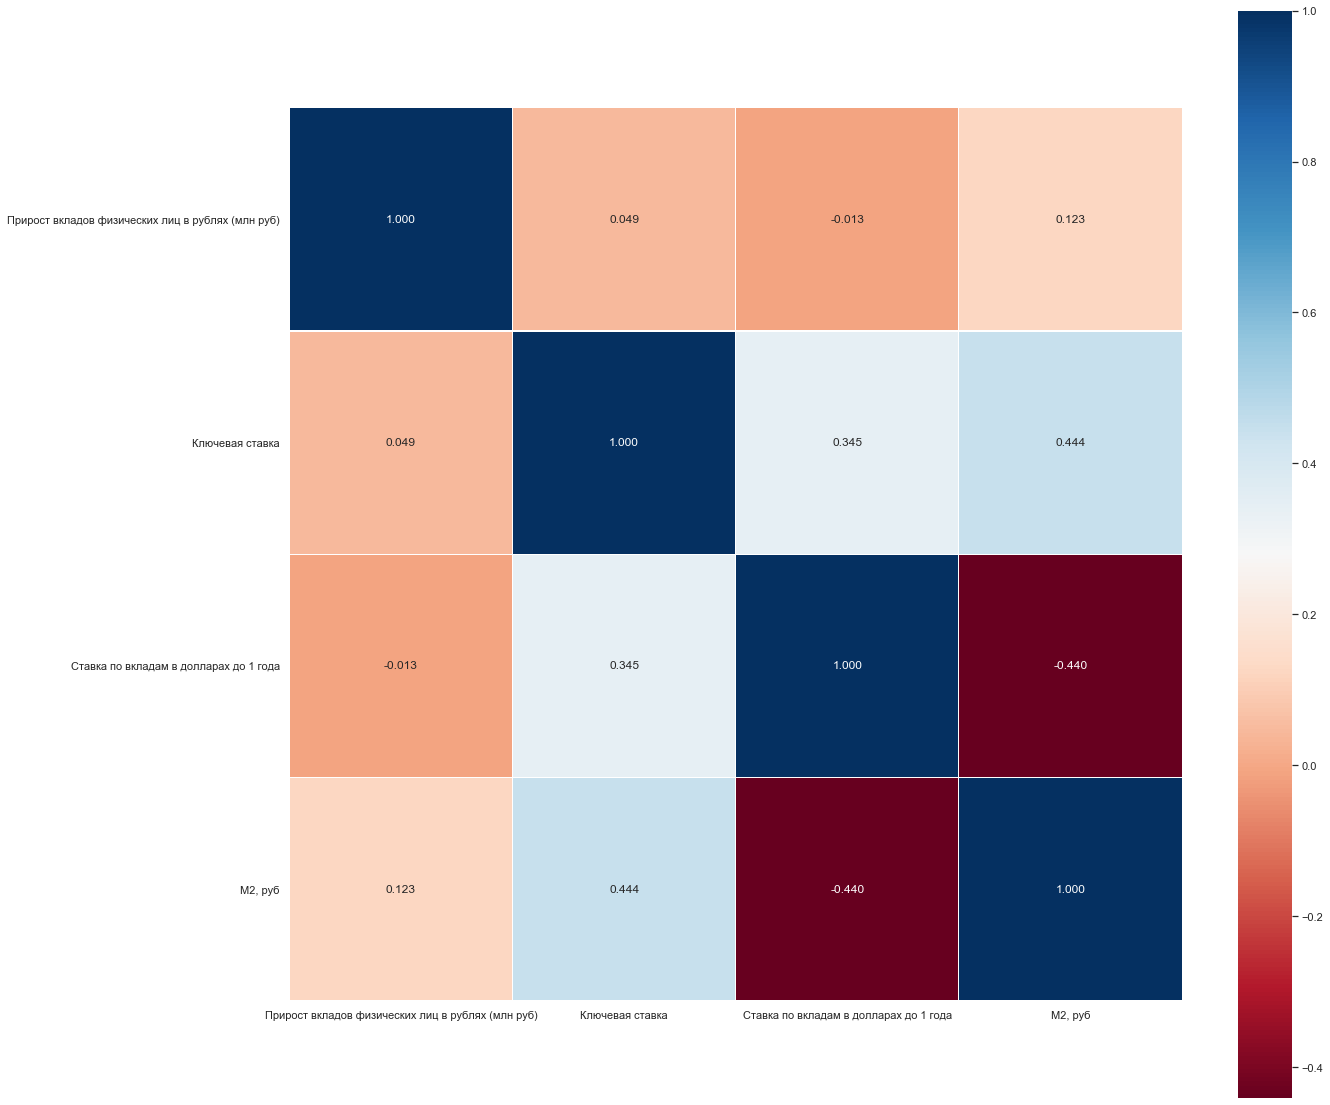

In [13]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
            annot=True, fmt=".3f", linewidths=0.1, cmap="RdBu")

In [14]:
df.columns

Index(['Прирост вкладов физических лиц в рублях (млн руб)', 'Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года', 'М2, руб'],
      dtype='object')

In [15]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'Прирост вкладов физических лиц в рублях (млн руб)'], 
                        df.loc[df.loc[:, column] == comb[1], 'Прирост вкладов физических лиц в рублях (млн руб)'], nan_policy='omit').pvalue \
            <= 0.5/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [16]:
for col in ['Ключевая ставка',
       'Ставка по вкладам в долларах до 1 года', 'М2, руб']:
    get_stat_dif(col)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


__Выводы__
- Во всех колонках отсутствуют пустые значения. 
- Выбросов нет.
- Распределение у большинства признаков не является нормальным, были сделаны попытки "сгладить", с помощью логарифмирования и извлечения квадратного корня. Эта тактика была умеренно успешной для признаков Доходность ОФЗ по сроку до 1 года, М2, руб, М0, руб, Номинальная средняя з/п, руб, Ставка по вкладам в рублях до 1 года.
- После избавления от мультиколлинеарности остались признаки 'Ключевая ставка', 'Ставка по вкладам в долларах до 1 года', 'М2, руб'

# Построение модели 

Сначала отделим таргет от признаков

In [54]:
y = df['Прирост вкладов физических лиц в рублях (млн руб)']
X = df.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__Как надо разбивать выборку для временных рядов__                                               Разбиение на тренировочный и тестовый сеты нужно выполнять последовательно, иначе в алгоритм просочится информация из будущего, на которой он и обучается. 
Train_test_split разбивает данные случайным образом. При работе с временными рядами такой подход не работает, т.к. нарушается временная связь между данными ряда. 

In [47]:
splitCoef = 0.7 # 70 - тренировочный сет, 30 - тестовый сет

X_train, X_test, = np.split(X, [int(splitCoef*len(X))])
y_train, y_test, = np.split(y, [int(splitCoef*len(y))])

но когда я пробовала разбить выборку последовательно, то графики совсем расходились и значения метрик были очень плохие

Поскольку ни для одного из показателей распределение не совсем похоже на Гауссово (гистограмма не всегда похожа на колокол) - значит StandardScaler не совсем подойдет, но и выбросов нет, соответственно и не нужно использовать RobustScalar, поэтому будем использовать MinMaxScalar для нормализации признаков

Порядок действий такой
1. Сначала выборка делится на тренировочную и тестовую.
2. Для получения масштабированной тренировочной выборки к ней применяется метод fit_transform. Он последовательно выполняет fit (устанавливает параметры скейлера), и применяет скейлер уже с этими параметрами к предоставленным данным (transform). А к тестовой выборке мы применяем метод transform. Иначе параметры скейлера будут выставлены для тестовой выборки.

In [56]:
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

## Линейная регрессия

Объявляем и обучаем модель на тренировочной выборке

In [58]:
lrg = LinearRegression()
lrg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Делаем прогнозы на тестовой выборке

In [59]:
y_pred = lrg.predict(X_test)

Строим график 

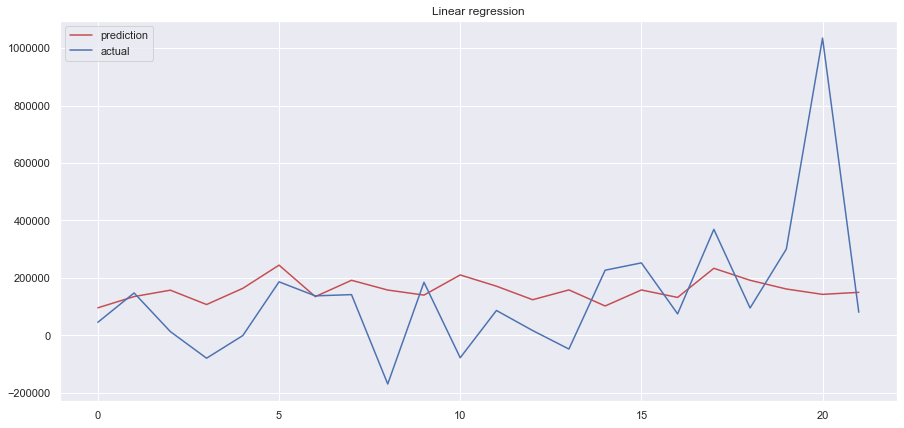

In [60]:
plt.figure(figsize=(15, 7))
plt.plot(y_pred, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression")
plt.grid(True);

Для более быстрого вывода сразу всех метрик качества для модели сделала функцию

In [37]:
def print_metrics(y_test, y_pred):
    print('MAE:', "%.4f" % mean_absolute_error(y_test, y_pred))
    print('RMSE:', "%.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))

In [46]:
print_metrics(y_test, y_pred)

MAE: 151492.7190
RMSE: 235302.6938


Выведем коэффициенты модели, которые показывают какие признаки вносят наибольший вклад в прогноз

In [51]:
print(lrg.intercept_,lrg.coef_)

30904.744974382396 [-154991.46515369  220571.71754363  159181.28556514]


In [52]:
Importance = pd.DataFrame({"feature": X.columns,  "importance": lrg.coef_})
Importance.head()

,feature,importance
0,Ключевая ставка,-154991.465154
1,Ставка по вкладам в долларах до 1 года,220571.717544
2,"М2, руб",159181.285565


# Кросс-валидация

Используем всю выборку, так как разбиение делаем на каждом шаге заново

In [53]:
y = df['Прирост вкладов физических лиц в рублях (млн руб)']
X = df.drop(['Прирост вкладов физических лиц в рублях (млн руб)'], axis=1)

Посмотрим на качество линейной регрессии по кросс-валидации.

In [54]:
lgr = LinearRegression()

cv_linear_reg_results = cross_val_score(
    lgr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_linear_reg_results

array([-6.17187612e+10, -5.66790385e+10, -1.45651789e+11, -4.56557385e+11,
       -1.93932907e+11])

In [55]:
np.mean(np.sqrt(-1*cv_linear_reg_results))

396843.6376711767

# Прогноз

Убираем из df_predict признаки, которые мы ранее удалили из df

In [214]:
df_predict.drop(['Прирост вкладов физических лиц в рублях (млн руб)', 'Доходность ОФЗ по сроку до 1 года', 'Ставка по вкладам в долларах до 1 года', 'Нефть марки Юралс, долл./барр', 'Индекс потребительских цен, ед.', 'М0, руб'], axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [215]:
df_predict

,Ключевая ставка,Ставка по вкладам в рублях до 1 года,"М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
Дата,,,,,
2017-01-01,10.00,6.50,38016.800000,59.96,34422
2017-02-01,10.00,6.30,38475.200000,58.39,35497
2017-03-01,9.75,5.91,38555.200000,58.10,37899
2017-04-01,9.75,6.25,38663.800000,56.43,39225
2017-05-01,9.25,6.10,39222.900000,57.17,39679
2017-06-01,9.00,5.70,39623.100000,57.82,41454
2017-07-01,9.00,6.07,39275.900000,59.67,38073
2017-08-01,9.00,6.07,39419.300000,59.65,37099
2017-09-01,8.50,5.31,39571.000000,57.73,38047


In [ ]:
df_predict = scaler.transform(df_predict)

Посмотрим, как будет выглядеть прогноз для линейной регрессии

In [218]:
y2017 = lrg.predict(df_predict)

In [219]:
y2017

array([1.84512881e+10, 2.02752125e+10, 2.59672179e+10, 2.89990856e+10,
       2.91436319e+10, 3.27659329e+10, 2.51556214e+10, 2.25464975e+10,
       2.45872460e+10, 2.52898510e+10, 2.56227180e+10, 5.00117684e+10])

# Точки роста для проекта

1. В отдельном файле рассмотрена модель ARIMA, но и для нее прогноз не столь хорош, видимо мешает сезонность у таргета. Поэтому надо попробовать модель SARIMA
2. Можно дополнить анализ корреляции критерием Стьюдента
3. Возможно стоит сгенерить новые признаки. Например, что-то подобное
- структура использования денежных доходов населения https://www.gks.ru/folder/13397?print=1 https://www.gks.ru/compendium/document/13270 чтобы посмотреть уровень сбережения, но тут не по всем годам, и не везде есть разбивка по месяцам
- объем кредитов, выданных населению https://www.cbr.ru/statistics/bank_system/4-3-1_11/ http://www.cbr.ru/statistics/table/?tableId=302-30&dt=20180501 но опять проблема с данными, не по всем годам они есть и не всегда есть нужная разбивка по месяцам